# Зависимости

In [32]:
!pip install kagglehub
!pip install matplotlib
!pip install ultralytics
!pip install opencv-python

In [38]:
import kagglehub

import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib

import cv2
import datetime

import ultralytics

# Скачивание 

In [9]:
import kagglehub

DATASET_PATH = kagglehub.dataset_download("hasyimabdillah/workoutfitness-video")
print("Path to dataset files:", DATASET_PATH)

Path to dataset files: C:\Users\dlyko\.cache\kagglehub\datasets\hasyimabdillah\workoutfitness-video\versions\5


# Интересующие нас упражнения

In [15]:
"""
Получить список всех классов (для перевода)
"""
print("\n".join(os.listdir(DATASET_PATH)))

barbell biceps curl
bench press
chest fly machine
deadlift
decline bench press
hammer curl
hip thrust
incline bench press
lat pulldown
lateral raise
leg extension
leg raises
plank
pull Up
push-up
romanian deadlift
russian twist
shoulder press
squat
t bar row
tricep dips
tricep Pushdown


подтягивания, отжимания на полу, отжимания на брусьях, обратные отжимания, подъём коленей, скручивания на скамье

- barbell biceps curl — сгибание рук с грифом (или со штангой) на бицепс
- bench press — жим лёжа
- chest fly machine — сведения рук в тренажёре для грудных мышц
- deadlift — становая тяга
- decline bench press — жим лёжа на наклонной (отрицательной) скамье
- hammer curl — сгибание рук молотковым хватом
- hip thrust — подъём таза
- incline bench press — жим лёжа на наклонной (положительной) скамье
- lat pulldown — тяга верхнего блока к груди
- lateral raise — подъём рук в стороны
- leg extension — разгибание ног в тренажёре
- **leg raises — подъём ног**
- plank — планка
- **pull Up — подтягивания**
- **push-up — отжимания**
- romanian deadlift — румынская тяга
- russian twist — скручивание «русский твист»
- shoulder press — жим штанги (гантелей) вверх / жим на плечи
- **squat — приседания**
- t bar row — тяга Т-грифа
- **tricep dips — отжимания на брусьях**
- tricep Pushdown — разгибание рук на блоке (для трицепса)

# Анализ датасета

In [16]:
"""
Кол-во классов всего
"""
len(os.listdir(DATASET_PATH))

22

In [35]:
special_dirs = ['leg raises', 'pull Up', 'push-up', 'squat', 'tricep dips']
dirs = os.listdir(DATASET_PATH)

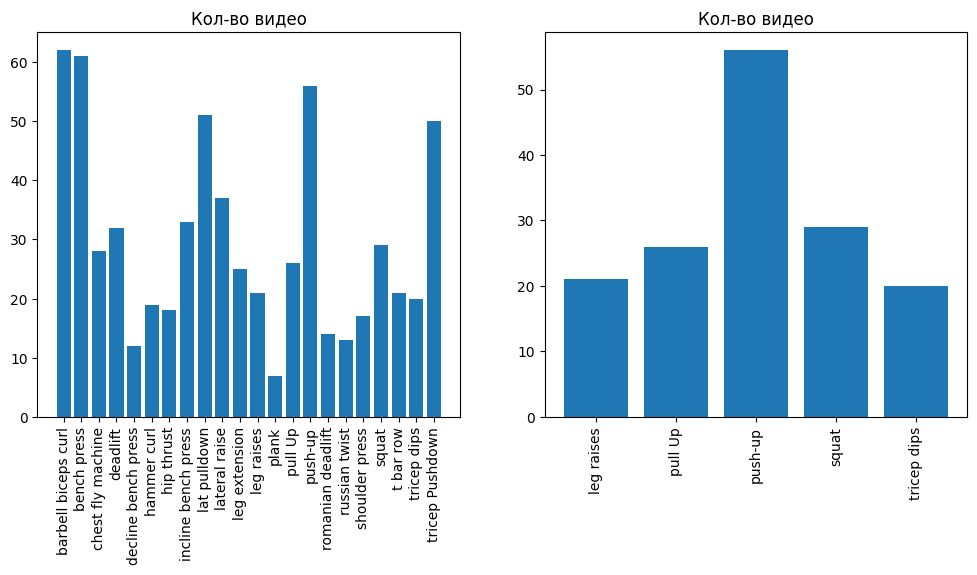

In [36]:
"""
Кол-во видео по классам
"""
file_amounts = []
for dir in dirs:
    folder_path = os.path.join(DATASET_PATH, dir)
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    file_amounts.append(len(files))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Кол-во видео")
plt.bar(dirs, file_amounts)
plt.xticks(rotation=90)

file_amounts = []
for dir in special_dirs:
    folder_path = os.path.join(DATASET_PATH, dir)
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    file_amounts.append(len(files))

plt.subplot(1, 2, 2)
plt.title("Кол-во видео")
plt.bar(special_dirs, file_amounts)
plt.xticks(rotation=90)

plt.show()

Processing: {} C:\Users\dlyko\.cache\kagglehub\datasets\hasyimabdillah\workoutfitness-video\versions\5\barbell biceps curl
Processing: {} C:\Users\dlyko\.cache\kagglehub\datasets\hasyimabdillah\workoutfitness-video\versions\5\bench press
Processing: {} C:\Users\dlyko\.cache\kagglehub\datasets\hasyimabdillah\workoutfitness-video\versions\5\chest fly machine
Processing: {} C:\Users\dlyko\.cache\kagglehub\datasets\hasyimabdillah\workoutfitness-video\versions\5\deadlift
Processing: {} C:\Users\dlyko\.cache\kagglehub\datasets\hasyimabdillah\workoutfitness-video\versions\5\decline bench press
Processing: {} C:\Users\dlyko\.cache\kagglehub\datasets\hasyimabdillah\workoutfitness-video\versions\5\hammer curl
Processing: {} C:\Users\dlyko\.cache\kagglehub\datasets\hasyimabdillah\workoutfitness-video\versions\5\hip thrust
Processing: {} C:\Users\dlyko\.cache\kagglehub\datasets\hasyimabdillah\workoutfitness-video\versions\5\incline bench press
Processing: {} C:\Users\dlyko\.cache\kagglehub\dataset

([0, 1, 2, 3, 4],
 [Text(0, 0, 'leg raises'),
  Text(1, 0, 'pull Up'),
  Text(2, 0, 'push-up'),
  Text(3, 0, 'squat'),
  Text(4, 0, 'tricep dips')])

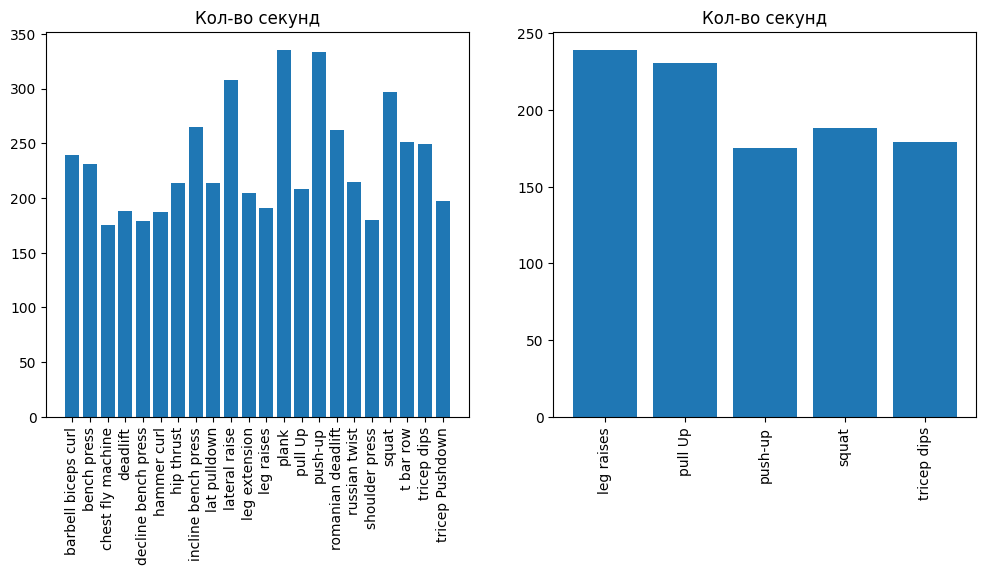

In [52]:
"""
Кол-во секунд по классам
"""
seconds_amount = [0 for i in range(len(dirs))]

for i in range(len(dirs)):
    dir = dirs[i]
    folder_path = os.path.join(DATASET_PATH, dir)
    print("Processing: {}", folder_path)
    for video_path in [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]:
        video = cv2.VideoCapture(os.path.join(folder_path, video_path))
        frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
        fps = video.get(cv2.CAP_PROP_FPS)
        seconds_amount[i] += round(frames / fps)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Кол-во секунд")
plt.bar(dirs, seconds_amount)
plt.xticks(rotation=90)

seconds_amount = [0 for i in range(len(special_dirs))]
for i in range(len(special_dirs)):
    dir = dirs[i]
    folder_path = os.path.join(DATASET_PATH, dir)
    print("Processing: {}", folder_path)
    for video_path in [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]:
        video = cv2.VideoCapture(os.path.join(folder_path, video_path))
        frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
        fps = video.get(cv2.CAP_PROP_FPS)
        seconds_amount[i] += round(frames / fps)

plt.subplot(1, 2, 2)
plt.title("Кол-во секунд")
plt.bar(special_dirs, seconds_amount)
plt.xticks(rotation=90)
